<a href="https://colab.research.google.com/github/Amakudegloria/Immobilien_Scout_24_Project/blob/main/Immobilien_Scout_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Immoscout](https://raw.githubusercontent.com/juliandnl/redi_ss20/master/image.png)

# **Immobilien Scout 24 Dataset**
Immobilien Scout 24 is the leading online platform for residential and commercial real estate in Germany. For over 20 years, ImmoScout24 has been revolutionising the real estate market, and supports 14.5 million users each month on their way to acquiring their new home or commercial space.

With its digital solutions, the online marketplace coordinates and brings owners, realtors, tenants and buyers successfully together. Immobilien Scout 24 is working towards the goal of digitising the process of real estate transactions and thereby making complex decisions easy. Since 2012, Immobilien Scout 24 has also been active in the German real estate market, reaching around 3 million users monthly.

This dataset contains entries from rental flats in Berlin. 

**Lets explore the dataset and find a suitable flat for my friend Josy, who is currently, desperately in need of a new flat in Berlin!!!**

**There are 6 relevant columns in this dataset, which are:**
- URL: is the link to the rental expose. You can have a look at the flat!
- Region: is the Berlin district, where the flat is located
- Condition: is the condition of the flat
- Rooms: The number of rooms the flat has
- Rent: Monthly rent for the flat
- Year_Construction: The year in which the house was build
- Space: How many square meters does the flat has?

---


**Let us start by asking questions we might want to understand the Immobilien scout data and to make smarter business decisions Questions such as;**

1. How many different Regions are there?
2. What is the maximum and minimum rent?
3. What is on average the most expensive region and at what size?
4. What is the mean rent for the different room sizes and per condition?
5. Which region has the best price per square meter?

# **Import Packages**

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import datetime
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **Load Dataset**

In [2]:
#loading the data from github files directly
rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")

##looking at the head of labeled data
rentals.head(10)

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27
5,Köpenick,well_kept,2.0,840.00,1997,73.51
6,Mitte,mint_condition,2.0,1509.45,2015,61.61
7,Charlottenburg,well_kept,2.0,730.73,1900,72.61
8,Friedrichsfelde,well_kept,2.0,561.93,1971,62.40
9,Tiergarten,first_time_use,3.0,1789.00,2020,77.66


# **Exploratory Data Analysis**

## **Checking shape, dtypes, missing values, duplicates**

In [3]:
#Get the number of rows
len(rentals)

764

In [4]:
##looking at the shape of Rental data
print(f"Rental data has {rentals.shape[0]} rows and {rentals.shape[1]} columns")

Rental data has 764 rows and 6 columns


In [5]:
##looking at dtypes 
print(rentals.dtypes)

Region                object
Condition             object
Rooms                float64
Rent                 float64
Year_Construction      int64
Space                float64
dtype: object


In [6]:
##looking at the continous varaiables of Rental data
rentals.describe(include='all')

,Region,Condition,Rooms,Rent,Year_Construction,Space
count,764,764,764.000000,764.000000,764.000000,764.000000
unique,10,9,NaN,NaN,NaN,NaN
top,Tiergarten,first_time_use,NaN,NaN,NaN,NaN
freq,171,270,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.549738,1768.560942,1983.695026,84.656270
std,NaN,NaN,1.010826,1118.263961,48.006060,44.195338
min,NaN,NaN,1.000000,271.250000,1864.000000,14.000000
25%,NaN,NaN,2.000000,1039.500000,1959.000000,55.097500
50%,NaN,NaN,2.500000,1565.480000,2015.000000,77.600000
75%,NaN,NaN,3.000000,2170.000000,2019.000000,104.450000


In [7]:
##Checking for missing values in Rental data
rentals.isna().sum()

Region               0
Condition            0
Rooms                0
Rent                 0
Year_Construction    0
Space                0
dtype: int64

### **Some initial observation**

* The number of rooms are in the range of 1-7 

* The monthly rents have a high range from 271 to 14207 Euros with an average rent of about 1768 Euros.

* The year of construction for the available apartments are between 1864 and 2020.

* There are 10 berlin regions available in the data.

* The room space ranges between 84m² and 413m²

* There are no missing values in the data

# **Checking the different Regions available**

In [8]:
#Checking the available regions in the Rental data

rentals.Region.unique()

array(['Mitte', 'Kreuzberg', 'Köpenick', 'Wilmersdorf', 'Charlottenburg',
       'Friedrichsfelde', 'Tiergarten', 'Prenzlauer', 'Wedding',
       'Neukölln'], dtype=object)

In [9]:
#More details about the regions
print(f"There are ten {rentals.Region.nunique()} regions available on the Immobilien Scout data which are; {rentals.Region.unique()}. Users can filter their searches based on the regions in berlin.")

There are ten 10 regions available on the Immobilien Scout data which are; ['Mitte' 'Kreuzberg' 'Köpenick' 'Wilmersdorf' 'Charlottenburg'
 'Friedrichsfelde' 'Tiergarten' 'Prenzlauer' 'Wedding' 'Neukölln']. Users can filter their searches based on the regions in berlin.


In [10]:
#Checking the minimum rent per apartment 
ren_min = rentals['Rent']== rentals['Rent'].min()
rentals[ren_min]

,Region,Condition,Rooms,Rent,Year_Construction,Space
177,Tiergarten,well_kept,1.0,271.25,1900,24.0


In [11]:
#Checking the maximum rent per apartment 
ren_max = rentals['Rent']== rentals['Rent'].max()
rentals[ren_max]


,Region,Condition,Rooms,Rent,Year_Construction,Space
694,Mitte,mint_condition,5.0,14207.0,2015,413.91


* The cheapest availble room on immobilien scout costs about 271 Euros monthly, while the most expensive room goes for 14207 and above. Although, we have to consider other factors that determine the rent.

In [12]:
#Lets find the average rent per room for a 1 bedroom apartment in all regions
one_bed = rentals['Rooms']==1
one_bed = rentals[one_bed]
one_bed = one_bed.groupby(['Region'])[['Rent']].agg('mean')
one_bed

,Rent
Region,
Charlottenburg,1080.083333
Friedrichsfelde,593.958000
Kreuzberg,907.182500
Köpenick,788.498750
Mitte,1047.050000
Neukölln,649.077273
Prenzlauer,892.715714
Tiergarten,794.130769
Wedding,699.206250


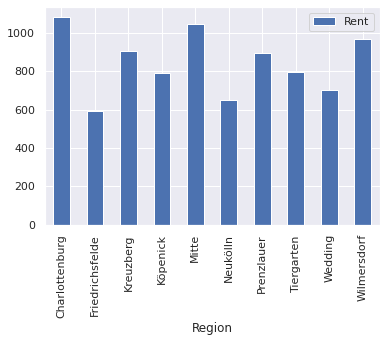

In [13]:
one_bed_plt = one_bed.plot.bar()
one_bed_plt

* The cheapest one bedroom apartment can be found in Friedrichsfelde which is located in the eastern suburb of Berlin at an average rental cost of 594 Euros. Individuals looking for an affordable apartment should maybe have a look at apartments in this region and avoid more expensive regions like Berlin Mitte (City Center) or charlottenburg.

# **What about the room sizes and space?**

---


In [14]:
#Checking the minimum number of rooms available
min_rooms = rentals['Rooms']== rentals['Rooms'].min()

rentals[min_rooms].sort_values(by='Rooms')

,Region,Condition,Rooms,Rent,Year_Construction,Space
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
520,Kreuzberg,well_kept,1.0,995.00,2016,36.00
517,Köpenick,well_kept,1.0,719.56,2016,28.40
513,Köpenick,well_kept,1.0,730.36,2016,32.61
500,Kreuzberg,refurbished,1.0,1175.72,1910,33.95
...,...,...,...,...,...,...
167,Tiergarten,first_time_use,1.0,999.00,2019,28.90
162,Tiergarten,no_information,1.0,421.87,1900,43.00
153,Charlottenburg,first_time_use,1.0,990.00,2019,23.62
147,Charlottenburg,first_time_use,1.0,1300.00,2019,38.36


In [15]:
#Checking the maximum number of rooms available
max_rooms = rentals['Rooms']== rentals['Rooms'].max()
rentals[max_rooms]


,Region,Condition,Rooms,Rent,Year_Construction,Space
101,Wilmersdorf,first_time_use_after_refurbishment,7.0,4288.00,1900,202.0
675,Wilmersdorf,well_kept,7.0,5876.35,1912,300.0


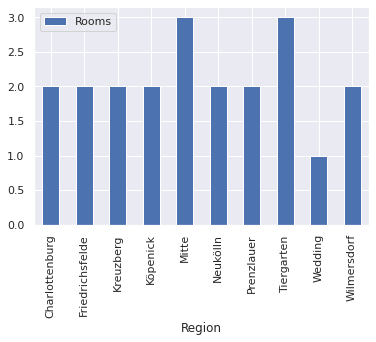

In [16]:
#Checking the most frequently advertised number of rooms in a region 
rentals.groupby(['Region'])[['Rooms']].agg(pd.Series.mode).plot.bar()

In [17]:
#Checking for four bedroom apartments and above
four_rooms = rentals['Rooms']>=4.0
four_rooms = rentals[four_rooms]
four_rooms.groupby('Region')[['Rooms']].count()

,Rooms
Region,
Charlottenburg,17
Friedrichsfelde,9
Kreuzberg,8
Köpenick,2
Mitte,33
Neukölln,3
Prenzlauer,11
Tiergarten,28
Wedding,2


* As mentioned earlier, the number of rooms are between 1 to 7 bedroom apartments.


* The two(2) rooms apartment are frequently advertised in majority of the regions except mitte and tiergarten where you can  mostly find 3 bedroom apartments. 

* If you may be looking for a 1 bedroom apartment and regions with more rental options to choose from, then Wedding is an easy region to start your search.


* Large families looking for apartments with 4 rooms and above would find lesser rental options within Köpenick, Neukölln or wedding regions and should consider regions such as charlottenburg, tiergarten or mitte.

# **A look at the rental conditions within these regions**

**Answer:**

Apartments in mint conditions or first time use are often more expensive, which is expected due to its condition. For an individual looking for an affordation or low budget accommodation, he/she should focus more on apartments in need of renovation or just well kept.

In [18]:
#Checking the condition of apartments within regions 
rentals.groupby(['Region'])[['Condition']].agg(pd.Series.mode)

,Condition
Region,
Charlottenburg,first_time_use
Friedrichsfelde,first_time_use
Kreuzberg,mint_condition
Köpenick,well_kept
Mitte,mint_condition
Neukölln,first_time_use
Prenzlauer,mint_condition
Tiergarten,first_time_use
Wedding,mint_condition


newly developing regions


In [19]:
#Looking at the condition of a 1 bedroom apartment in mitte

bed_apart = rentals['Rooms']==1
mit_apart =  rentals['Region']=='Mitte' 

bed_mitte = bed_apart & mit_apart
avg_one_bed = rentals[bed_mitte]

avg_one_bed = avg_one_bed.groupby(['Condition'])[['Rent']].agg('mean')
avg_one_bed

,Rent
Condition,
first_time_use,894.00
fully_renovated,1200.00
mint_condition,1093.01
well_kept,924.44


# **What about the year of construction?**


In [20]:
#A look at the earliest construction year for these apartments 
min_const_yr = rentals['Year_Construction']== rentals['Year_Construction'].min()
rentals[min_const_yr]

,Region,Condition,Rooms,Rent,Year_Construction,Space
173,Mitte,first_time_use_after_refurbishment,3.0,2199.0,1864,106.98


In [21]:
#A look at the most recent construction year for these apartments 
max_const_yr = rentals['Year_Construction']== rentals['Year_Construction'].max()
rentals[max_const_yr].iloc[0]

Region                    Kreuzberg
Condition            first_time_use
Rooms                             1
Rent                           1200
Year_Construction              2020
Space                         29.33
Name: 1, dtype: object

# **Condition of apartments within the year 1864 and 2000**

In [22]:
#Lets have a look athe condition of apartments between 1864 and 2000
early_years = rentals['Year_Construction'].between(1864, 2004)
early_years = rentals[early_years]

#Find the most common condition with this period
early_years.groupby(['Year_Construction'])[['Condition']].agg(pd.Series.mode)


,Condition
Year_Construction,
1864,first_time_use_after_refurbishment
1867,first_time_use
1870,first_time_use_after_refurbishment
1873,well_kept
1874,first_time_use_after_refurbishment
...,...
1997,well_kept
1998,fully_renovated
1999,well_kept


In [23]:
#All conditions during this time frame
early_years['Condition'].unique()

array(['well_kept', 'mint_condition', 'fully_renovated', 'no_information',
       'first_time_use_after_refurbishment', 'first_time_use',
       'refurbished', 'modernized', 'need_of_renovation'], dtype=object)

In [24]:
#Lets have a look athe condition of apartments between 2005 and 2020
late_years = rentals['Year_Construction'].between(2005, 2020)
late_years = rentals[late_years]

#Find the most common condition with this period
late_years.groupby(['Year_Construction'])[['Condition']].agg(pd.Series.mode)

,Condition
Year_Construction,
2005,first_time_use
2006,"[mint_condition, no_information]"
2008,mint_condition
2009,"[mint_condition, well_kept]"
2010,mint_condition
2011,no_information
2012,fully_renovated
2013,mint_condition
2014,mint_condition


In [25]:
#All conditions during this time frame
late_years['Condition'].unique()

array(['first_time_use', 'mint_condition', 'well_kept', 'no_information',
       'fully_renovated', 'first_time_use_after_refurbishment',
       'refurbished', 'modernized'], dtype=object)

### **Further Observations**

* The apartments available were constructed between the year 1864 and 2020.

* Apartments between 1864 and 2000 are mostly well_kept, refurbished, or in need_of_renovation. A good number of them are also in good condition but this is expected because these are old buildings.

* On the other hand, if you are looking for a more modern, first time use apart ments, then it would be best to consider apartments contructed between 2005 and 2020 as they mostly fulfil these conditions. 

#**Let's recommend a good flat to Jane!**
My friend Jane is looking for a flat. She is still a student and cannot afford an expensive flat. Are there flats with a rent less than 500€ and more than 25 sqm (Space). She would like to move to Kreuzberg, Wedding, Prenzlauer Berg or Mitte. Is there a flat with two rooms and these constraints?

Any suitable flats? Share the url !

In [26]:
#Filter based on her condition
rentals[(rentals['Rent']< 500) & (rentals['Space'] > 25) & 
        ((rentals['Region'] == "Kreuzberg") | (rentals['Region'] == "Wedding")| 
         (rentals['Region'] == "Prenzlauer Berg")| (rentals['Region'] == "Mitte")) &  
        (rentals['Rooms'] == 2)]

,Region,Condition,Rooms,Rent,Year_Construction,Space
97,Wedding,no_information,2.0,383.46,1890,48.23


## **My recommendations to Jane:**
Hi Jane,
So i filtered the search based on your request and most important criteria (Rent, Space, Region, No. of rooms) and I can recommend a 48.23m2, two bedroom apartment in Wedding at a rental cost of 383.46 Euros per month. Here is the URL for the Ad; https://www.immobilienscout24.de/expose/116697084

# **ML Prediction**

## **Predicting Year of Construction on rental price**

In [27]:
rentals.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [28]:
#We can use the get_dummies function of the pandas library in order to convert a column to its one hot encoded version.
dummy = pd.get_dummies(rentals['Region'])

# We merge the new results again into a new dataframe
rentals = pd.concat([rentals,dummy],axis=1)

# Select the column that we want to teach the algorithm to predict
predictors = ['Rooms','Space','Mitte', 'Kreuzberg', 'Köpenick', 'Wilmersdorf', 'Charlottenburg',
       'Friedrichsfelde', 'Tiergarten', 'Prenzlauer', 'Wedding',
       'Neukölln']

X= rentals[predictors]

Y= rentals['Rent']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1) 

In [30]:
clf= LinearRegression()

In [31]:
#Fit linear model
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#Time to Predict using the linear model
clf.predict(X_test)

array([3571.13080474, 4686.69105015, 3131.96586289, 1833.79381253,
       1680.2042806 , 1006.93982489, 2643.06956618,  165.51128737,
       1931.53601388, 3779.12166539, 1765.11429929, 1700.40998379,
       1455.56320955, 1377.61241223, 1045.46925548,  983.30681259,
       2248.30174828, 1894.52744943, 1312.12557299, 2391.22897773,
       1774.40084406,  280.32534656, 2076.43565762,  703.10208765,
       1657.13087831, 1495.23248888, 2099.39239309, 1889.92066968,
       1875.06024727, 8816.25819677, 4618.69932586, 2957.53642984,
       2347.10811912,  683.02853289, 1542.17078377, 1699.36298839,
       1472.84825718, 1162.72822075, 2014.71800181, 2143.13057234,
       1444.21151824, 3832.4608557 ,  765.80337512,  566.23891922,
       1823.48156984,  993.3243656 , 1006.13131223, 2121.09273409,
       1323.92908468, 2578.83573665, 1376.75199249, 2509.81910764,
       4310.82760672,  303.00220207, 1026.0313581 , 2343.99260838,
       1634.08216346, 1926.82132343, 1517.81398665, 1530.32770

## This gives our model an accuracy of 90%

In [33]:
clf.score(X_test,Y_test) 

0.7951393870057795